In [4]:
import pandas as pd
import numpy as np

np.random.seed(1)

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from datetime import datetime
#from keras import tensorflow as tf
import tensorflow as tf

In [5]:
f_name = '../data/all_data_s.npy'

np_input_full = np.array(np.load(f_name)).astype(np.float32)

In [7]:
#np_input=np_input_full[0:1000,:]    this does not work?
np_input=np_input_full

X_node=np_input[:,0:768]
X_load=np_input[:,768:770]
y=np_input[:,770:1538]

img_rows=24
img_cols=32

X_node=np.array([row.reshape(img_rows,img_cols) for row in X_node])
y=np.array([row.reshape(img_rows,img_cols) for row in y])

X_train, X_val, y_train, y_val = train_test_split(X_node, y, test_size = 5, random_state=1)


In [30]:
model = Sequential([
    # Conv2Dinput_shape=(24,32,1),strides=[1, 1, 1, 1], padding='SAME',activation='relu'),
    # MaxPool2D(ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'),
    Conv2D(filters=10, input_shape=(24,32,1),strides=(1,1), padding='SAME',activation='relu',kernel_size=3),
    MaxPool2D(pool_size=(1,2), strides=(1,2), padding='SAME'),
    Conv2D(filters=30,input_shape=(13,16,64),strides=(1,1), padding='SAME',activation='relu',kernel_size=3),
    MaxPool2D(pool_size=(1,2), strides=(1,2), padding='SAME'),
    Flatten(),
    Dropout(0.5),
    Dense(units=3074,activation='relu'),
    Dense(units=1024,activation='softplus'),
    Dropout(0.5),
    Dense(units=1024,activation='softplus'),
    Dense(units=3072,activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Reshape([6,8,64]),
    # h_fc4_drop = tf.nn.dropout(h_fc4,keep_prob)
    # h_fc4_drop_flat = tf.reshape(h_fc4_drop, [-1,6,8,64]) #Nonex6x8x64 的向量
    tf.keras.layers.UpSampling2D(size=(2,2)),
    # model.layers.UpSampling2D(size=(2,2))(h_fc4_drop_flat)
    #h_fc4_up = tf.keras.layers.UpSampling2D(size=(2,2))(h_fc4_drop_flat) #Nonex12x16x64
    Conv2D(filters=50,input_shape=(12,16,32),strides=(1,1), padding='SAME',activation='relu',kernel_size=3),
    tf.keras.layers.UpSampling2D(size=(2,2)),
    #h_conv3_up = tf.keras.layers.UpSampling2D(size=(2,2))(h_conv3) #Nonex24x32x32
    Conv2D(filters=70,input_shape=(24,32,16),strides=(1,1), padding='SAME',activation='relu',kernel_size=3),
    Conv2D(filters=1,input_shape=(24,32,1),strides=(1,1), padding='SAME',activation='relu',kernel_size=3)
])
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)


es = tf.keras.callbacks.EarlyStopping(monitor='mean_squared_error', mode='min', verbose=1, patience=50,min_delta=50)
cb_list=[es]   #modelcheckpoint h5py

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),   #X_val
    epochs=20,
    verbose=1,
    callbacks=cb_list
)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 24, 32, 10)        100       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 24, 16, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 24, 16, 30)        2730      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 24, 8, 30)        0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 5760)              0         
                                                                 
 dense_50 (Dense)            (None, 3074)            

KeyboardInterrupt: 

#![alt text](scsnet.png "scsnet")
#![alt text](scsnetWriteUp.png "scsnet")


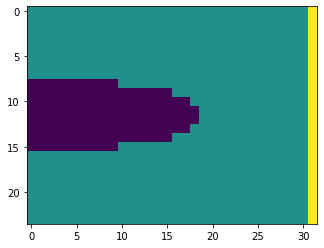

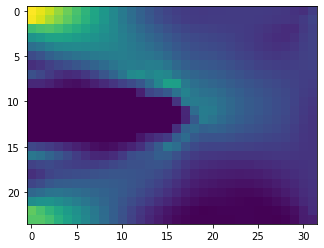

(120955, 24, 32)

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(X_train[50], interpolation='nearest')
plt.show()

plt.imshow(y_train[50], interpolation='nearest')
plt.show()

X_train.shape

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),   #X_val
    epochs=40,
    verbose=1,
)



Epoch 1/40
3780/3780 [==============================] - 29s 8ms/step - loss: 8721.0781 - mean_squared_error: 8721.0781 - val_loss: 4554.1973 - val_mean_squared_error: 4554.1973
Epoch 2/40
3780/3780 [==============================] - 28s 7ms/step - loss: 7361.3047 - mean_squared_error: 7361.3047 - val_loss: 4050.0476 - val_mean_squared_error: 4050.0476
Epoch 3/40
3780/3780 [==============================] - 30s 8ms/step - loss: 6948.8408 - mean_squared_error: 6948.8408 - val_loss: 3646.9766 - val_mean_squared_error: 3646.9766
Epoch 4/40
3780/3780 [==============================] - 31s 8ms/step - loss: 6763.6143 - mean_squared_error: 6763.6143 - val_loss: 3940.9426 - val_mean_squared_error: 3940.9426
Epoch 5/40
3780/3780 [==============================] - 31s 8ms/step - loss: 6637.5737 - mean_squared_error: 6637.5737 - val_loss: 3542.4414 - val_mean_squared_error: 3542.4414
Epoch 6/40
3780/3780 [==============================] - 30s 8ms/step - loss: 6498.4146 - mean_squared_error: 6498.4

In [31]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['mean_squared_error', 'val_mean_squared_error']].plot();

NameError: name 'history' is not defined

In [19]:
predRowStart=0
predRowFin=20
predictions=model.predict(
    #X_val[0:10],
    X_val[predRowStart:predRowFin],
    verbose=2
)

1/1 - 0s - 78ms/epoch - 78ms/step


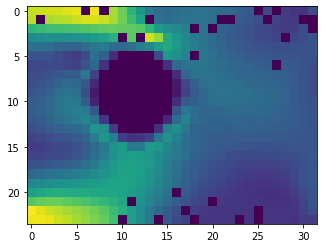

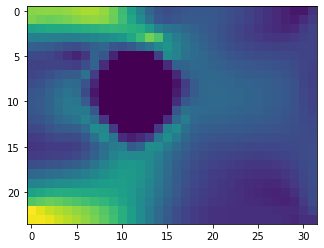

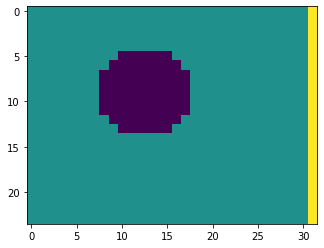

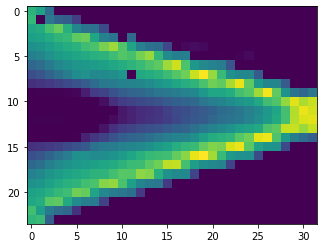

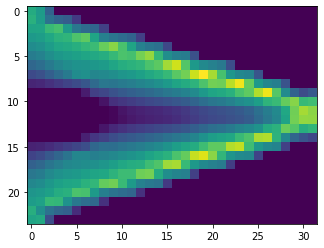

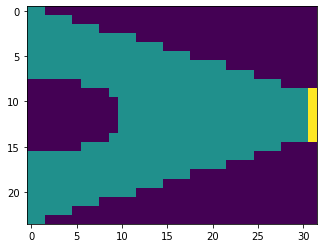

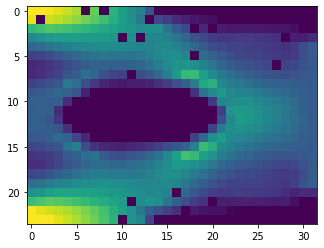

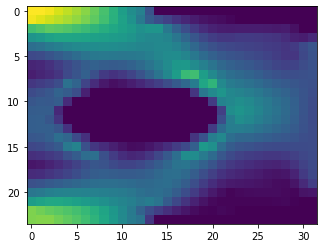

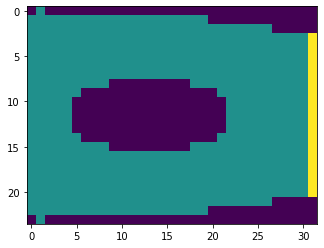

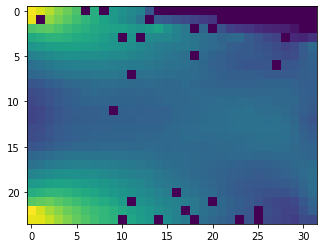

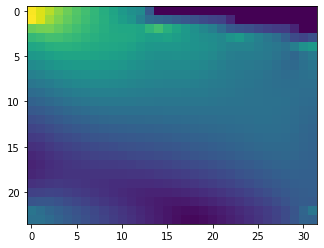

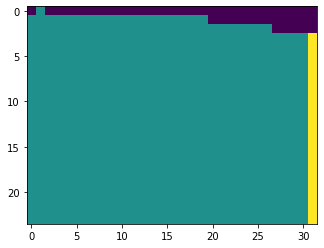

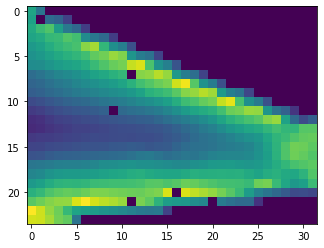

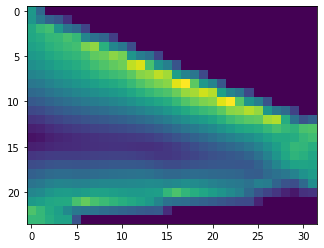

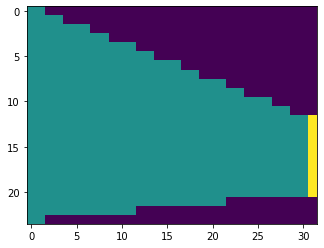

IndexError: index 5 is out of bounds for axis 0 with size 5

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt

predic=np.array([row.reshape(img_rows,img_cols) for row in predictions])

for row in range(predRowStart,predRowFin):
    plt.imshow(predic[row], interpolation='nearest')
    plt.show()

    plt.imshow(y_val[row], interpolation='nearest')
    plt.show()

    plt.imshow(X_val[row], interpolation='nearest')
    plt.show()

#X_train, X_val, y_train, y_val = train_test_split(X_node, y, test_size = 5, random_state=1) d


In [ ]:


"""
    conv  e1   kern 3x3   stride = 1x1  padding=0   24x32x1                i did not use 0 padding?
    max-pooling e2  24x32x32
    conv  e3   kern 3x3  stride=1x1 padding=0  13x16x64
    max-pooling e4  6x8x64
    reshape e5  3074x1x1
    fully connected  e6  1024x1x1
    fully conc e7  30x1x1

    obtain the latent fr of geometry at
    load vector (qx,qy) concatenated w/ fr and fed to new fr  FR  32x1x1

    Decoder:
    fc d1  1024x1x1
    fc d2   3074x1x1
    loads (or reshape?) ?    d3     6x8x64
    upsampleing d4   12x16x64
    cnn+relu d5   12x16x32
    upsampleing d6   24x31x32
    cnn+relu d7 24x32x16
    cnn+relu d8 24x32x1
"""


"""#This is the best model we found. For additional models, check out I_notebook.ipynb
start = datetime.now()
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(300, activation=LeakyReLU(alpha=0.3)))

model.compile(loss='categorical_crossentropy',
   optimizer='adam',
   metrics=['acc'])
history = model.fit(X_train, y_train,
   epochs=7,
   batch_size=batch_size,
   validation_data=(X_val, y_val))
#model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate(
    X_val, y_val, batch_size=batch_size,     verbose=1)
#print(“[INFO] accuracy: {:.2f}%”.format(eval_accuracy * 100))
#print(“[INFO] Loss: {}”.format(eval_loss))
end= datetime.now()
elapsed= end-start
print ('Time: ', elapsed)"""